In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_rows',None)
sns.set()
warnings.filterwarnings("ignore")

In [2]:
!ls

ashrae-energy-prediction.zip  sample_submission.csv  weather_test.csv
building_metadata.csv	      test.csv		     weather_train.csv
EDA.ipynb		      train.csv


In [3]:
train_df = pd.read_csv('train.csv')
print(train_df.shape)
train_df.head()

(20216100, 4)


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


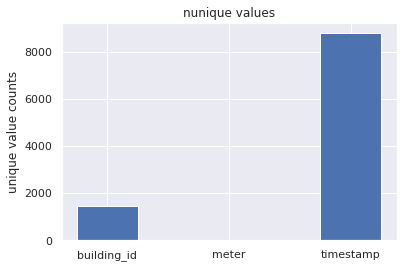

In [4]:
_ = plt.bar(train_df.columns.values[:3],train_df.nunique().values[:3],width=0.5)
_ = plt.ylabel('unique value counts')
_ = plt.title('nunique values')
plt.show()

In [5]:
train_df['meter'].value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

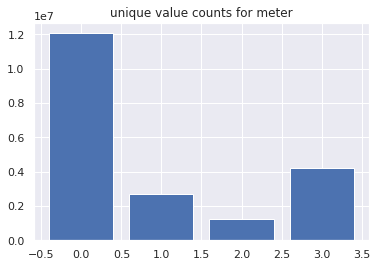

In [6]:
_ = plt.bar(train_df.meter.unique(),train_df.meter.value_counts())
_ = plt.title('unique value counts for meter')
plt.show()

In [7]:
grouped = train_df.groupby(['building_id'])
len(grouped)

1449

In [15]:
df_0 = grouped.get_group(0)
print(df_0.shape)
df_0.head()

(8784, 4)


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
2301,0,0,2016-01-01 01:00:00,0.0
4594,0,0,2016-01-01 02:00:00,0.0
6893,0,0,2016-01-01 03:00:00,0.0
9189,0,0,2016-01-01 04:00:00,0.0


In [18]:
df_0['meter'].value_counts()

0    8784
Name: meter, dtype: int64

In [48]:
df_0['date'] = df_0['timestamp'].apply(lambda x: x.split(' ')[0])
df_0['time'] = df_0['timestamp'].apply(lambda x: x.split(' ')[1])
df_0['month'] = df_0['date'].apply(lambda x: x.split('-')[1])
df_0.head()

,building_id,meter,timestamp,meter_reading,date,time,month
0,0,0,2016-01-01 00:00:00,0.0,2016-01-01,00:00:00,01
2301,0,0,2016-01-01 01:00:00,0.0,2016-01-01,01:00:00,01
4594,0,0,2016-01-01 02:00:00,0.0,2016-01-01,02:00:00,01
6893,0,0,2016-01-01 03:00:00,0.0,2016-01-01,03:00:00,01
9189,0,0,2016-01-01 04:00:00,0.0,2016-01-01,04:00:00,01


In [49]:
gr_ts = df_0.groupby(['month'])
len(gr_ts)

12

In [50]:
mean = []
date = []
for i in gr_ts.groups.keys():
    df = gr_ts.get_group(i)
    mean.append(df['meter_reading'].mean())

**Month wise group for building_id 0** trail 2

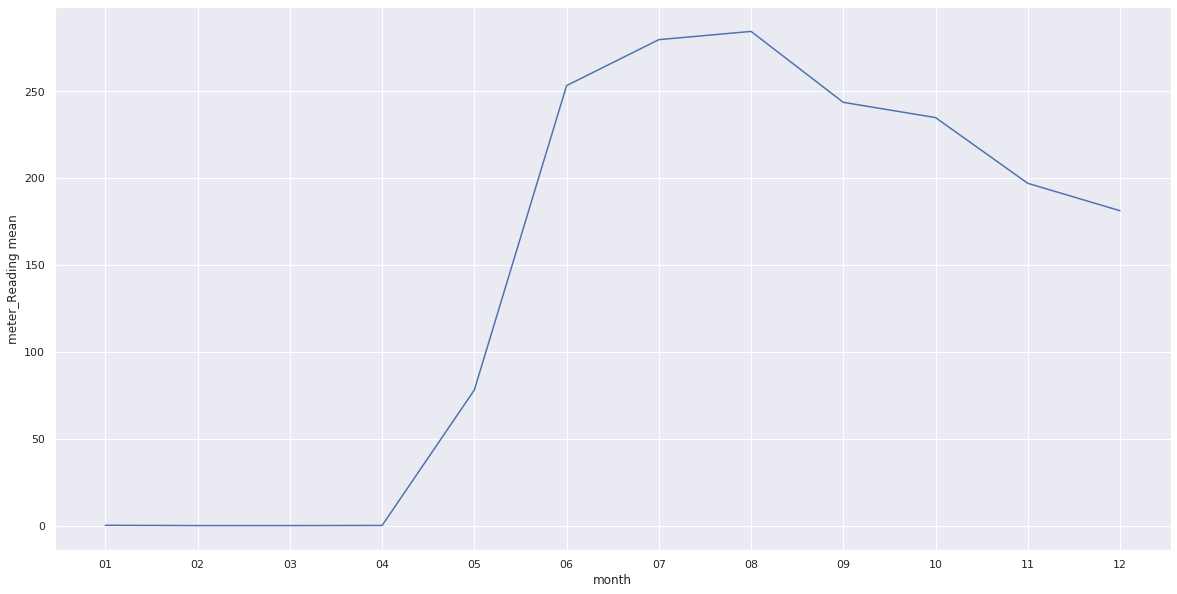

In [53]:
plt.figure(figsize=(20,10))
_ = plt.plot(list(gr_ts.groups.keys()),mean)
_ = plt.xlabel('month')
_ = plt.ylabel('meter_Reading mean')
plt.show()

**Date wise group for building_id 0** trail 1

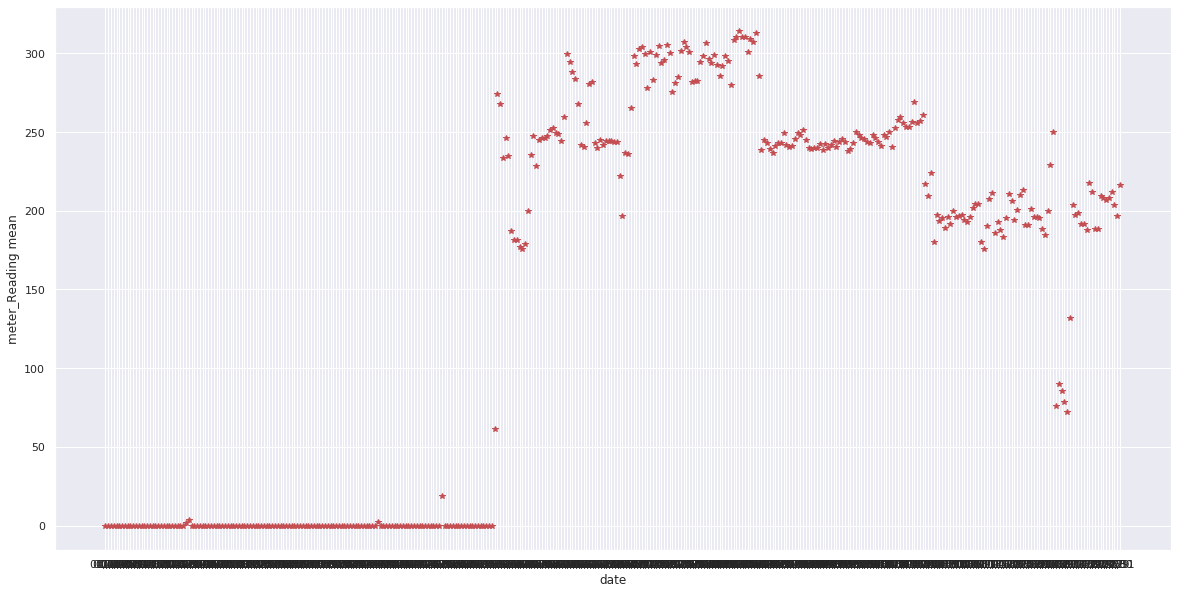

In [43]:
plt.figure(figsize=(20,10))
_ = plt.plot(date,mean,'r*')
_ = plt.xlabel('date')
_ = plt.ylabel('meter_Reading mean')
plt.show()

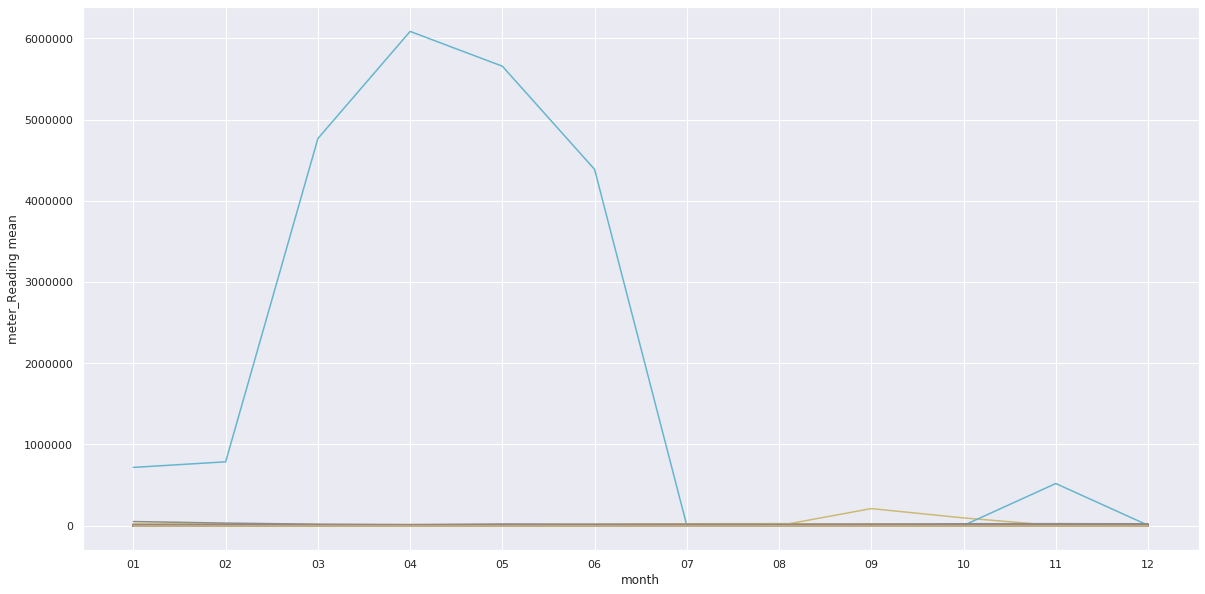

In [59]:
def plot_mean_graph(grouped_df):
    
    plt.figure(figsize=(20,10))
    for i,building in enumerate(list(grouped_df.groups.keys())):
        df = grouped_df.get_group(building)
        df['date'] = df['timestamp'].apply(lambda x: x.split(' ')[0])
        df['time'] = df['timestamp'].apply(lambda x: x.split(' ')[1])
        df['month'] = df['date'].apply(lambda x: x.split('-')[1])
        gr_ts = df.groupby(['month'])
        
        mean = []
        for i in gr_ts.groups.keys():
            df = gr_ts.get_group(i)
            mean.append(df['meter_reading'].mean())
        
        _ = plt.plot(list(gr_ts.groups.keys()),mean,label = building)
    _ = plt.xlabel('month')
    _ = plt.ylabel('meter_Reading mean')
#     plt.legend()
    plt.show()
plot_mean_graph(grouped)

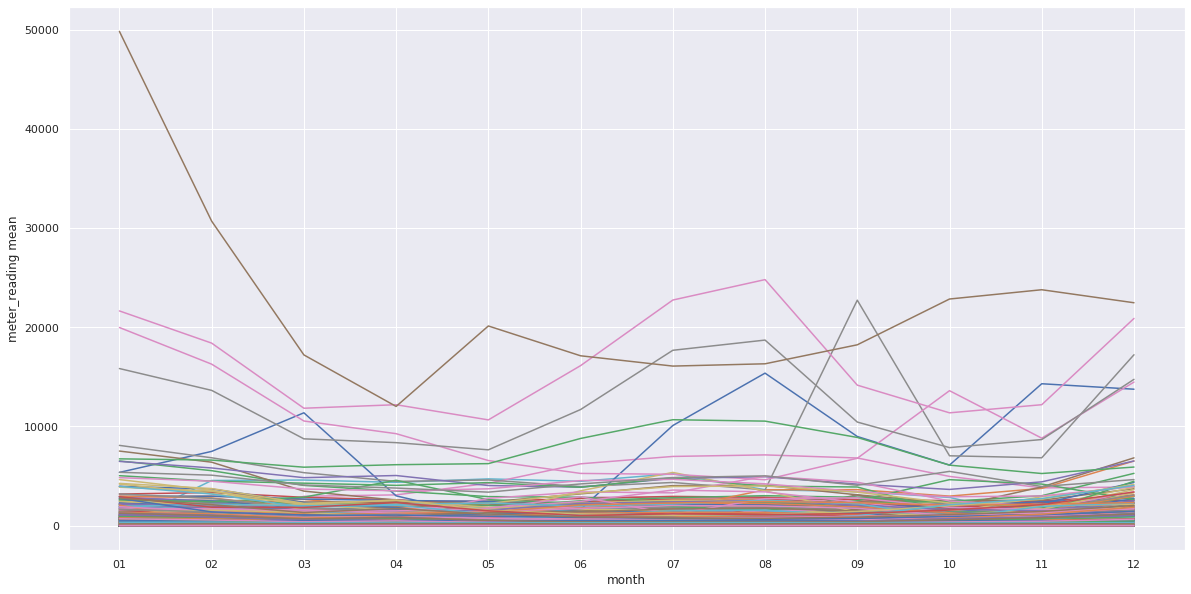

In [62]:
def plot_mean_graph(grouped_df):
    
    plt.figure(figsize=(20,10))
    for i,building in enumerate(list(grouped_df.groups.keys())):
        df = grouped_df.get_group(building)
        df['date'] = df['timestamp'].apply(lambda x: x.split(' ')[0])
        df['time'] = df['timestamp'].apply(lambda x: x.split(' ')[1])
        df['month'] = df['date'].apply(lambda x: x.split('-')[1])
        gr_ts = df.groupby(['month'])
        
        mean = []
        for i in gr_ts.groups.keys():
            df = gr_ts.get_group(i)
            mean.append(df['meter_reading'].mean())
        
        mean = np.array(mean)
        if mean.max() <= 200000:
            _ = plt.plot(list(gr_ts.groups.keys()),mean,label = building)
    _ = plt.xlabel('month')
    _ = plt.ylabel('meter_reading mean')
#     plt.legend()
    plt.show()
plot_mean_graph(grouped)